In [1]:
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from pyproj import CRS
import wrf
import cartopy.crs as ccrs
import regionmask
import geopandas as gp
from os import path
import pickle
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import cartopy.io.shapereader as shpreader
import matplotlib.patheffects as PathEffects
from matplotlib import colormaps
from matplotlib import colors
import sys  
# sys.path.insert(1, 'functions_programs/')
# import functions
from shapely import geometry
import pandas as pd
import glob

In [2]:
file_base = "/data/keeling/a/erickkc2/scratch/2LDRM_AMZ2/01_inputs/CPM/AMZ2_CPM*_PW24.dat"
nx = 1055
ny = 863

file_out = "/data/keeling/a/erickkc2/scratch/2LDRM_AMZ2/01_inputs/CPM/mask_topo.dat"

In [3]:
files_toread = sorted(glob.glob(file_base))

In [5]:
792/2

396.0

In [6]:
# data = np.fromfile(file_base, dtype=np.float32)
data = np.concatenate([np.fromfile(file, dtype=np.float32) for file in files_toread])

ntimes = len(data) // (nx*ny)
data = np.reshape(data,(ntimes,ny,nx))

In [7]:
data_avg = data.mean(axis = 0)

In [8]:
masktopo = np.isfinite(data_avg).astype(np.float32)

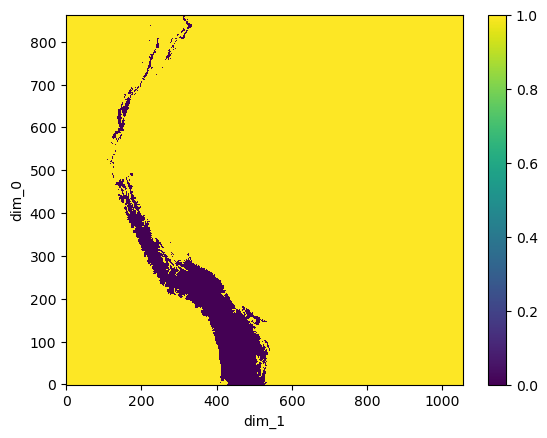

In [9]:
xr.DataArray(masktopo).plot()

In [10]:
f = open(file_out, "wb")
f.write(np.isfinite(data_avg).astype('float32', order = "C"))  # !!! MODIFIED
f.close()


### verifying

In [11]:
ave = np.fromfile(file_out, dtype=np.float32)
ave = np.reshape(ave,(ny,nx))

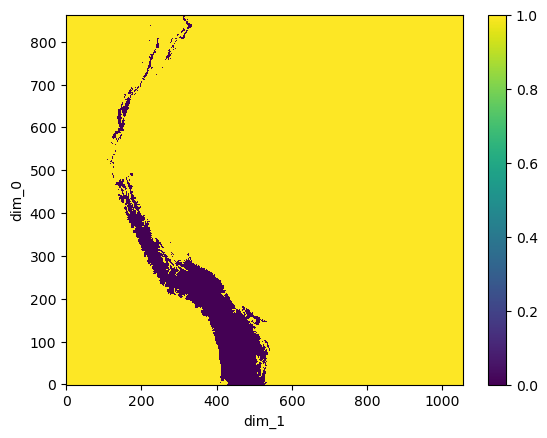

In [12]:
xr.DataArray(ave).plot()